In [12]:
import requests
import json
import pandas as pd

# Get all strains
API_KEY = 'uEH5NtA'

request_url = f"http://strainapi.evanbusse.com/{API_KEY}/strains/search/all"
response = requests.get(request_url)
data = json.loads(response.text)


In [13]:
# Get all strains
strain_names = pd.DataFrame(list(data.keys()), columns =['name'])

# Get strain characteristics
strain_values = list(data.values())
strain_values = pd.DataFrame.from_dict(strain_values)

# Add strain name to the dataframe
strains_raw = pd.concat([strain_names, strain_values], axis=1)

# Take a look at the data
strains_raw.head()

,name,id,race,flavors,effects
0,Afpak,1,hybrid,"[Earthy, Chemical, Pine]","{'positive': ['Relaxed', 'Hungry', 'Happy', 'S..."
1,African,2,sativa,"[Spicy/Herbal, Pungent, Earthy]","{'positive': ['Euphoric', 'Happy', 'Creative',..."
2,Afternoon Delight,3,hybrid,"[Pepper, Flowery, Pine]","{'positive': ['Relaxed', 'Hungry', 'Euphoric',..."
3,Afwreck,4,hybrid,"[Pine, Earthy, Flowery]","{'positive': ['Relaxed', 'Happy', 'Creative', ..."
4,Agent Orange,5,hybrid,"[Citrus, Orange, Sweet]","{'positive': ['Relaxed', 'Euphoric', 'Happy', ..."


In [14]:
# Get a line for each type of effect
strains = strains_raw.effects.apply(pd.Series) \
    .merge(strains_raw, right_index = True, left_index = True) \
    .drop(["effects"], axis = 1)
strains

,positive,negative,medical,name,id,race,flavors
0,"[Relaxed, Hungry, Happy, Sleepy]",[Dizzy],"[Depression, Insomnia, Pain, Stress, Lack of A...",Afpak,1,hybrid,"[Earthy, Chemical, Pine]"
1,"[Euphoric, Happy, Creative, Energetic, Talkative]",[Dry Mouth],"[Depression, Pain, Stress, Lack of Appetite, N...",African,2,sativa,"[Spicy/Herbal, Pungent, Earthy]"
2,"[Relaxed, Hungry, Euphoric, Uplifted, Tingly]","[Dizzy, Dry Mouth, Paranoid]","[Depression, Insomnia, Pain, Stress, Cramps, H...",Afternoon Delight,3,hybrid,"[Pepper, Flowery, Pine]"
3,"[Relaxed, Happy, Creative, Uplifted, Sleepy]","[Dizzy, Dry Mouth, Paranoid, Dry Eyes]","[Pain, Stress, Headache, Fatigue, Headaches, M...",Afwreck,4,hybrid,"[Pine, Earthy, Flowery]"
4,"[Relaxed, Euphoric, Happy, Energetic, Uplifted]","[Dizzy, Dry Mouth, Paranoid, Dry Eyes]","[Depression, Pain, Stress, Nausea, Headache, H...",Agent Orange,5,hybrid,"[Citrus, Orange, Sweet]"
...,...,...,...,...,...,...,...
1965,"[Relaxed, Happy, Energetic, Uplifted, Focused]","[Dizzy, Dry Mouth, Paranoid, Dry Eyes]","[Depression, Insomnia, Pain, Stress, Fatigue]",Zeus OG,2158,hybrid,"[Earthy, Woody, Pine]"
1966,"[Relaxed, Euphoric, Happy, Uplifted, Sleepy]","[Dizzy, Dry Mouth, Dry Eyes]","[Depression, Insomnia, Pain, Stress, Nausea, H...",Zkittlez,2159,indica,"[Sweet, Berry, Grape]"
1967,"[Relaxed, Euphoric, Happy, Sleepy, Giggly]","[Dizzy, Dry Mouth, Paranoid, Dry Eyes]","[Depression, Insomnia, Pain, Stress, Lack of A...",Zombie OG,2160,indica,"[Earthy, Pungent, Sweet]"
1968,"[Relaxed, Hungry, Happy, Uplifted, Giggly]",[],"[Insomnia, Pain, Cramps, Lack of Appetite, Mus...",Zoom Pie,2161,indica,"[Berry, Earthy, Pungent]"


In [15]:
# Get the description for every strain_id
unique_ids = strains['id'].unique()
descriptions = []
for id in unique_ids:
    request_url = f"http://strainapi.evanbusse.com/{API_KEY}/strains/data/desc/{id}"
    response = requests.get(request_url)
    data = json.loads(response.text)
    desc = list(data.values())
    descriptions.append({'id':id, 'description':desc})
descriptions = pd.DataFrame(descriptions)
descriptions.head()

,id,description
0,1,"[Afpak, named for its direct Afghani and Pakis..."
1,2,[African refers to the indigenous varieties of...
2,3,"[Afternoon Delight, created by Colorado Seed I..."
3,4,[Afwreck is a hybrid cross of Afghani and Trai...
4,5,[Don’t let the name scare you! The only herbic...


In [16]:
# Add description to the df
strains = strains.merge(descriptions, on='id')
strains

,positive,negative,medical,name,id,race,flavors,description
0,"[Relaxed, Hungry, Happy, Sleepy]",[Dizzy],"[Depression, Insomnia, Pain, Stress, Lack of A...",Afpak,1,hybrid,"[Earthy, Chemical, Pine]","[Afpak, named for its direct Afghani and Pakis..."
1,"[Euphoric, Happy, Creative, Energetic, Talkative]",[Dry Mouth],"[Depression, Pain, Stress, Lack of Appetite, N...",African,2,sativa,"[Spicy/Herbal, Pungent, Earthy]",[African refers to the indigenous varieties of...
2,"[Relaxed, Hungry, Euphoric, Uplifted, Tingly]","[Dizzy, Dry Mouth, Paranoid]","[Depression, Insomnia, Pain, Stress, Cramps, H...",Afternoon Delight,3,hybrid,"[Pepper, Flowery, Pine]","[Afternoon Delight, created by Colorado Seed I..."
3,"[Relaxed, Happy, Creative, Uplifted, Sleepy]","[Dizzy, Dry Mouth, Paranoid, Dry Eyes]","[Pain, Stress, Headache, Fatigue, Headaches, M...",Afwreck,4,hybrid,"[Pine, Earthy, Flowery]",[Afwreck is a hybrid cross of Afghani and Trai...
4,"[Relaxed, Euphoric, Happy, Energetic, Uplifted]","[Dizzy, Dry Mouth, Paranoid, Dry Eyes]","[Depression, Pain, Stress, Nausea, Headache, H...",Agent Orange,5,hybrid,"[Citrus, Orange, Sweet]",[Don’t let the name scare you! The only herbic...
...,...,...,...,...,...,...,...,...
1965,"[Relaxed, Happy, Energetic, Uplifted, Focused]","[Dizzy, Dry Mouth, Paranoid, Dry Eyes]","[Depression, Insomnia, Pain, Stress, Fatigue]",Zeus OG,2158,hybrid,"[Earthy, Woody, Pine]",[Zeus OG is a hybrid cross between Pineapple O...
1966,"[Relaxed, Euphoric, Happy, Uplifted, Sleepy]","[Dizzy, Dry Mouth, Dry Eyes]","[Depression, Insomnia, Pain, Stress, Nausea, H...",Zkittlez,2159,indica,"[Sweet, Berry, Grape]",[Zkittlez is an indica-dominant mix of Grape A...
1967,"[Relaxed, Euphoric, Happy, Sleepy, Giggly]","[Dizzy, Dry Mouth, Paranoid, Dry Eyes]","[Depression, Insomnia, Pain, Stress, Lack of A...",Zombie OG,2160,indica,"[Earthy, Pungent, Sweet]",[If you’re looking to transform into a flesh-e...
1968,"[Relaxed, Hungry, Happy, Uplifted, Giggly]",[],"[Insomnia, Pain, Cramps, Lack of Appetite, Mus...",Zoom Pie,2161,indica,"[Berry, Earthy, Pungent]",[Zoom Pie (also known as Zombie Pie) is a heav...


In [17]:
# Change column order
cols = ['id', 'name', 'race', 'flavors', 'positive', 'negative', 'medical', 'description']
strains = strains[cols]
strains.head(1)

,id,name,race,flavors,positive,negative,medical,description
0,1,Afpak,hybrid,"[Earthy, Chemical, Pine]","[Relaxed, Hungry, Happy, Sleepy]",[Dizzy],"[Depression, Insomnia, Pain, Stress, Lack of A...","[Afpak, named for its direct Afghani and Pakis..."


In [18]:
# Combine everything in one column
strains['Combined'] = strains[strains.columns[3:]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)
strains

/Users/Medy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,id,name,race,flavors,positive,negative,medical,description,Combined
0,1,Afpak,hybrid,"[Earthy, Chemical, Pine]","[Relaxed, Hungry, Happy, Sleepy]",[Dizzy],"[Depression, Insomnia, Pain, Stress, Lack of A...","[Afpak, named for its direct Afghani and Pakis...","['Earthy', 'Chemical', 'Pine'],['Relaxed', 'Hu..."
1,2,African,sativa,"[Spicy/Herbal, Pungent, Earthy]","[Euphoric, Happy, Creative, Energetic, Talkative]",[Dry Mouth],"[Depression, Pain, Stress, Lack of Appetite, N...",[African refers to the indigenous varieties of...,"['Spicy/Herbal', 'Pungent', 'Earthy'],['Euphor..."
2,3,Afternoon Delight,hybrid,"[Pepper, Flowery, Pine]","[Relaxed, Hungry, Euphoric, Uplifted, Tingly]","[Dizzy, Dry Mouth, Paranoid]","[Depression, Insomnia, Pain, Stress, Cramps, H...","[Afternoon Delight, created by Colorado Seed I...","['Pepper', 'Flowery', 'Pine'],['Relaxed', 'Hun..."
3,4,Afwreck,hybrid,"[Pine, Earthy, Flowery]","[Relaxed, Happy, Creative, Uplifted, Sleepy]","[Dizzy, Dry Mouth, Paranoid, Dry Eyes]","[Pain, Stress, Headache, Fatigue, Headaches, M...",[Afwreck is a hybrid cross of Afghani and Trai...,"['Pine', 'Earthy', 'Flowery'],['Relaxed', 'Hap..."
4,5,Agent Orange,hybrid,"[Citrus, Orange, Sweet]","[Relaxed, Euphoric, Happy, Energetic, Uplifted]","[Dizzy, Dry Mouth, Paranoid, Dry Eyes]","[Depression, Pain, Stress, Nausea, Headache, H...",[Don’t let the name scare you! The only herbic...,"['Citrus', 'Orange', 'Sweet'],['Relaxed', 'Eup..."
...,...,...,...,...,...,...,...,...,...
1965,2158,Zeus OG,hybrid,"[Earthy, Woody, Pine]","[Relaxed, Happy, Energetic, Uplifted, Focused]","[Dizzy, Dry Mouth, Paranoid, Dry Eyes]","[Depression, Insomnia, Pain, Stress, Fatigue]",[Zeus OG is a hybrid cross between Pineapple O...,"['Earthy', 'Woody', 'Pine'],['Relaxed', 'Happy..."
1966,2159,Zkittlez,indica,"[Sweet, Berry, Grape]","[Relaxed, Euphoric, Happy, Uplifted, Sleepy]","[Dizzy, Dry Mouth, Dry Eyes]","[Depression, Insomnia, Pain, Stress, Nausea, H...",[Zkittlez is an indica-dominant mix of Grape A...,"['Sweet', 'Berry', 'Grape'],['Relaxed', 'Eupho..."
1967,2160,Zombie OG,indica,"[Earthy, Pungent, Sweet]","[Relaxed, Euphoric, Happy, Sleepy, Giggly]","[Dizzy, Dry Mouth, Paranoid, Dry Eyes]","[Depression, Insomnia, Pain, Stress, Lack of A...",[If you’re looking to transform into a flesh-e...,"['Earthy', 'Pungent', 'Sweet'],['Relaxed', 'Eu..."
1968,2161,Zoom Pie,indica,"[Berry, Earthy, Pungent]","[Relaxed, Hungry, Happy, Uplifted, Giggly]",[],"[Insomnia, Pain, Cramps, Lack of Appetite, Mus...",[Zoom Pie (also known as Zombie Pie) is a heav...,"['Berry', 'Earthy', 'Pungent'],['Relaxed', 'Hu..."


In [49]:
strains.tail()

,id,name,race,flavors,positive,negative,medical,description,Combined
1965,2158,Zeus OG,hybrid,"[Earthy, Woody, Pine]","[Relaxed, Happy, Energetic, Uplifted, Focused]","[Dizzy, Dry Mouth, Paranoid, Dry Eyes]","[Depression, Insomnia, Pain, Stress, Fatigue]",[Zeus OG is a hybrid cross between Pineapple O...,"['Earthy', 'Woody', 'Pine'],['Relaxed', 'Happy..."
1966,2159,Zkittlez,indica,"[Sweet, Berry, Grape]","[Relaxed, Euphoric, Happy, Uplifted, Sleepy]","[Dizzy, Dry Mouth, Dry Eyes]","[Depression, Insomnia, Pain, Stress, Nausea, H...",[Zkittlez is an indica-dominant mix of Grape A...,"['Sweet', 'Berry', 'Grape'],['Relaxed', 'Eupho..."
1967,2160,Zombie OG,indica,"[Earthy, Pungent, Sweet]","[Relaxed, Euphoric, Happy, Sleepy, Giggly]","[Dizzy, Dry Mouth, Paranoid, Dry Eyes]","[Depression, Insomnia, Pain, Stress, Lack of A...",[If you’re looking to transform into a flesh-e...,"['Earthy', 'Pungent', 'Sweet'],['Relaxed', 'Eu..."
1968,2161,Zoom Pie,indica,"[Berry, Earthy, Pungent]","[Relaxed, Hungry, Happy, Uplifted, Giggly]",[],"[Insomnia, Pain, Cramps, Lack of Appetite, Mus...",[Zoom Pie (also known as Zombie Pie) is a heav...,"['Berry', 'Earthy', 'Pungent'],['Relaxed', 'Hu..."
1969,2162,ʻAlenuihāhā,hybrid,"[Sweet, Tropical, Pineapple]","[Euphoric, Happy, Creative, Energetic, Aroused]","[Dizzy, Dry Mouth, Paranoid, Anxious]","[Depression, Stress, Fatigue]",[ʻAlenuihāhā is a sativa-dominant hybrid by Pu...,"['Sweet', 'Tropical', 'Pineapple'],['Euphoric'..."


In [50]:
!python -m spacy download en_core_web_lg

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [51]:
import pandas as pd
from flask import request
import requests
import json
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
import spacy
import seaborn as sns
nlp = spacy.load('en_core_web_lg')

In [42]:
strains['Combined'][0]

"['Earthy', 'Chemical', 'Pine'],['Relaxed', 'Hungry', 'Happy', 'Sleepy'],['Dizzy'],['Depression', 'Insomnia', 'Pain', 'Stress', 'Lack of Appetite'],['Afpak, named for its direct Afghani and Pakistani landrace heritage, is a beautiful indica-dominant hybrid with light green and deep bluish purple leaves. The taste and aroma are floral with a touch of lemon, making the inhale light and smooth. Its effects start in the stomach by activating the appetite. There is also a potent relaxation that starts in the head and face, and gradually sinks down into the body. Enjoy this strain if you’re suffering from stress, mild physical discomfort, or having difficulty eating. \\xa0']"

In [52]:
type(strains['Combined'][0])

str

In [27]:
# vect = CountVectorizer()

In [29]:
# vect.fit(strains['Combined'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [53]:
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

In [54]:
dtm = tfidf.fit_transform(strains['Combined'])

In [30]:
# dtm = vect.transform(strains['Combined'])

In [31]:
# print(vect.get_feature_names())

['00', '07', '09', '10', '100', '11', '115', '12', '120', '13', '14', '15', '16', '1600s', '17', '18', '19', '1900', '1960', '1960s', '1967', '1969', '1970', '1970s', '1973', '1974', '1975', '1979', '1980', '1980s', '1985', '1986', '1988', '1989', '1990', '1990s', '1991', '1993', '1994', '1996', '1997', '1998', '1999', '19th', '1st', '20', '2000', '2000s', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2010s', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '21', '22', '23', '24', '25', '26', '27', '28', '29', '2k', '2nd', '30', '300', '303', '32', '33', '35', '36', '38', '39', '3c', '3d', '3rd', '40', '41', '42', '420', '43', '44', '45', '45g', '47', '4th', '50', '500', '501st', '51', '52', '55', '550', '56', '57', '58', '59', '60', '600', '606', '63', '636', '64', '65', '650', '66', '67', '69', '70', '707', '70s', '710', '72', '75', '750g', '76', '78', '7th', '80', '80s', '84', '85', '86', '88', '89', '90', '90s', '91', '92', '94', '95', '98'

In [ ]:
print(dtm)

In [33]:
# dtm.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 0, 0, 2]])

In [34]:
# dtm = vect.transform(strains['Combined'])

In [55]:
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

In [56]:
dtm.head()

,09,10,100,11,12,13,14,15,16,17,...,zen,zest,zestful,zesty,zeta,zion,zkittlez,zombie,zone,ʻalenuihāhā
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
# doc_len = [len(doc) for doc in strains['Combined']]

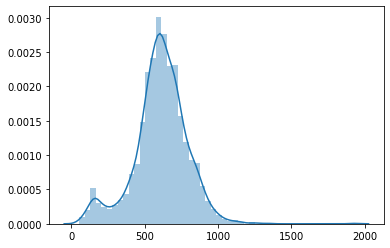

In [41]:
# sns.distplot(doc_len);

In [57]:
# Calculate Distance of TF-IDF Vectors
from sklearn.metrics.pairwise import cosine_similarity

dist_matrix  = cosine_similarity(dtm)

In [58]:
df = pd.DataFrame(dist_matrix)

In [59]:
df.shape

(1970, 1970)

In [62]:
strains['Combined'][0]

"['Earthy', 'Chemical', 'Pine'],['Relaxed', 'Hungry', 'Happy', 'Sleepy'],['Dizzy'],['Depression', 'Insomnia', 'Pain', 'Stress', 'Lack of Appetite'],['Afpak, named for its direct Afghani and Pakistani landrace heritage, is a beautiful indica-dominant hybrid with light green and deep bluish purple leaves. The taste and aroma are floral with a touch of lemon, making the inhale light and smooth. Its effects start in the stomach by activating the appetite. There is also a potent relaxation that starts in the head and face, and gradually sinks down into the body. Enjoy this strain if you’re suffering from stress, mild physical discomfort, or having difficulty eating. \\xa0']"

In [63]:
df[0]

0       1.000000
1       0.044468
2       0.060770
3       0.106337
4       0.053862
          ...   
1965    0.036566
1966    0.065819
1967    0.126475
1968    0.099830
1969    0.033919
Name: 0, Length: 1970, dtype: float64

In [64]:
# Grab the row
df[df[0] < 1][0].sort_values(ascending=False)[:5]

0       1.000000
593     0.200106
1383    0.162912
1122    0.156385
946     0.147333
Name: 0, dtype: float64

In [66]:
print(strains['Combined'][0])

['Earthy', 'Chemical', 'Pine'],['Relaxed', 'Hungry', 'Happy', 'Sleepy'],['Dizzy'],['Depression', 'Insomnia', 'Pain', 'Stress', 'Lack of Appetite'],['Afpak, named for its direct Afghani and Pakistani landrace heritage, is a beautiful indica-dominant hybrid with light green and deep bluish purple leaves. The taste and aroma are floral with a touch of lemon, making the inhale light and smooth. Its effects start in the stomach by activating the appetite. There is also a potent relaxation that starts in the head and face, and gradually sinks down into the body. Enjoy this strain if you’re suffering from stress, mild physical discomfort, or having difficulty eating. \xa0']


In [67]:
print(strains['Combined'][593])

['Earthy', 'Sweet', 'Pungent'],['Relaxed', 'Hungry', 'Euphoric', 'Happy', 'Sleepy'],['Dizzy', 'Dry Mouth', 'Paranoid', 'Dry Eyes', 'Anxious'],['Depression', 'Insomnia', 'Pain', 'Stress', 'Lack of Appetite'],['Do-Si-Dos is an indica-dominant hybrid with qualities similar to its parent, Girl Scout Cookies. With glittering trichomes, bright pistils, and lime green and lavender leaves, this strain is a feast for eyes. Its aroma is pungent, sweet, and earthy with slight floral funkiness. These classic OG aromas blend nicely with medical-grade body effects that lean toward the sedative side with the addition of Face Off OG genetics. Enjoy a stoney, in-your-face buzz off the start that melts down over the body, prettifying the consumer with relaxation that emanates outward.\xa0']


In [68]:
dtm.head()

,09,10,100,11,12,13,14,15,16,17,...,zen,zest,zestful,zesty,zeta,zion,zkittlez,zombie,zone,ʻalenuihāhā
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
from sklearn.neighbors import NearestNeighbors

# Fit on DTM
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [70]:
nn.kneighbors([dtm.iloc[0].values])

(array([[0.        , 1.26482729, 1.29389936, 1.29893431, 1.3058842 ]]),
 array([[   0,  593, 1383, 1122,  946]]))

In [71]:
nn.kneighbors([dtm.iloc[0].values])

(array([[0.        , 1.26482729, 1.29389936, 1.29893431, 1.3058842 ]]),
 array([[   0,  593, 1383, 1122,  946]]))

In [72]:
# Query Using kneighbors 
nn.kneighbors([dtm.iloc[256]])

(array([[0.        , 1.21532335, 1.2822921 , 1.28422796, 1.28830615]]),
 array([[ 256,  240,   76, 1578, 1649]]))

In [73]:
strains['Combined'][256]

"['Earthy', 'Pungent', 'Berry'],['Relaxed', 'Happy', 'Energetic', 'Uplifted', 'Focused'],['Dry Mouth'],['Depression', 'Pain', 'Stress', 'Nausea', 'Headache', 'Fatigue'],['Blue Dot, also known as MGB or Medical Grade Bud,\\xa0is a\\xa0sativa-dominant strain\\xa0originally bred\\xa0in Sonoma, California\\xa0by a medical patient. Blue Dot is a genetic blend of Leda Uno, Northern Lights, and Haze\\xa0. Its resinous buds offer a sweet\\xa0hashy\\xa0flavor profile, and can be expected to finish flowering in 9 to 10 weeks.']"

In [74]:
strains['Combined'][240]

"['Pine', 'Earthy', 'Sage'],['Relaxed', 'Euphoric', 'Happy', 'Uplifted', 'Sleepy'],['Dry Mouth'],['Insomnia', 'Pain', 'Stress', 'Nausea', 'Headache', 'Muscle Spasms'],['Blowfish is an indica-dominant hybrid bred by Dutch Flowers, who crossed a G13 and Oregon Funk hybrid with a G13 and Blue Dot hybrid to create this cannabis strain.']"

In [75]:
from joblib import dump
dump(nn, 'strains_recomender.joblib', compress=1)

['strains_recomender.joblib']